In [1]:
#Assessment 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
data = pd.read_csv('/content/historical_automobile_sales.csv')
data

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,8/31/2023,2023,Aug,0,103.36,0.25,27852.993,1793,6,57.169,0.764155,2.6,1579.6,Executivecar,New York
524,9/30/2023,2023,Sep,0,101.55,0.07,21183.704,1028,5,59.315,0.036180,2.5,1123.4,Smallfamiliycar,California
525,10/31/2023,2023,Oct,0,124.66,0.12,15975.589,1148,9,19.472,-2.046169,2.5,1685.9,Sports,California
526,11/30/2023,2023,Nov,0,97.09,0.25,16862.288,4850,5,27.904,0.302179,2.9,2124.6,Smallfamiliycar,Georgia


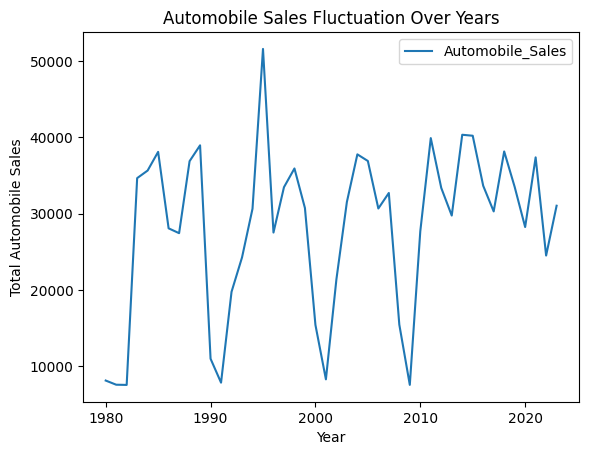

In [4]:
#Q 1: Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year.
yearly_sales = data.groupby('Year')['Automobile_Sales'].sum().reset_index()
# Create the line chart
yearly_sales.plot(x='Year', y='Automobile_Sales', kind='line')
plt.title('Automobile Sales Fluctuation Over Years')
plt.xlabel('Year')
plt.ylabel('Total Automobile Sales')
plt.show()

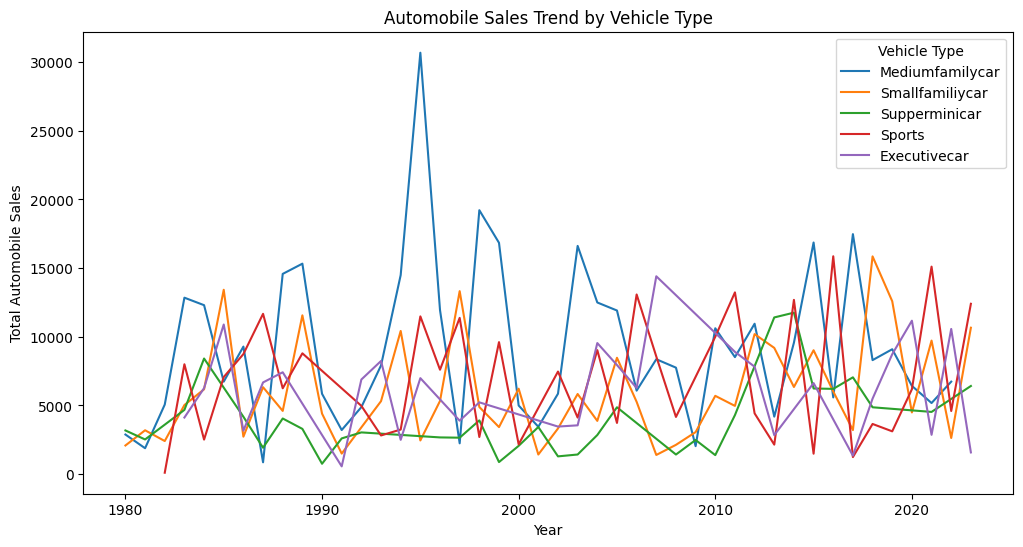

In [5]:
#Q 2: Plot different lines for categories of vehicle type and analyze the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?
# Group data by year and vehicle type, then sum sales
sales_by_type = data.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().reset_index()
# Create a line chart with separate lines for each vehicle type
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.lineplot(data=sales_by_type, x='Year', y='Automobile_Sales', hue='Vehicle_Type')
plt.title('Automobile Sales Trend by Vehicle Type')
plt.xlabel('Year')
plt.ylabel('Total Automobile Sales')
plt.legend(title='Vehicle Type')
plt.show()

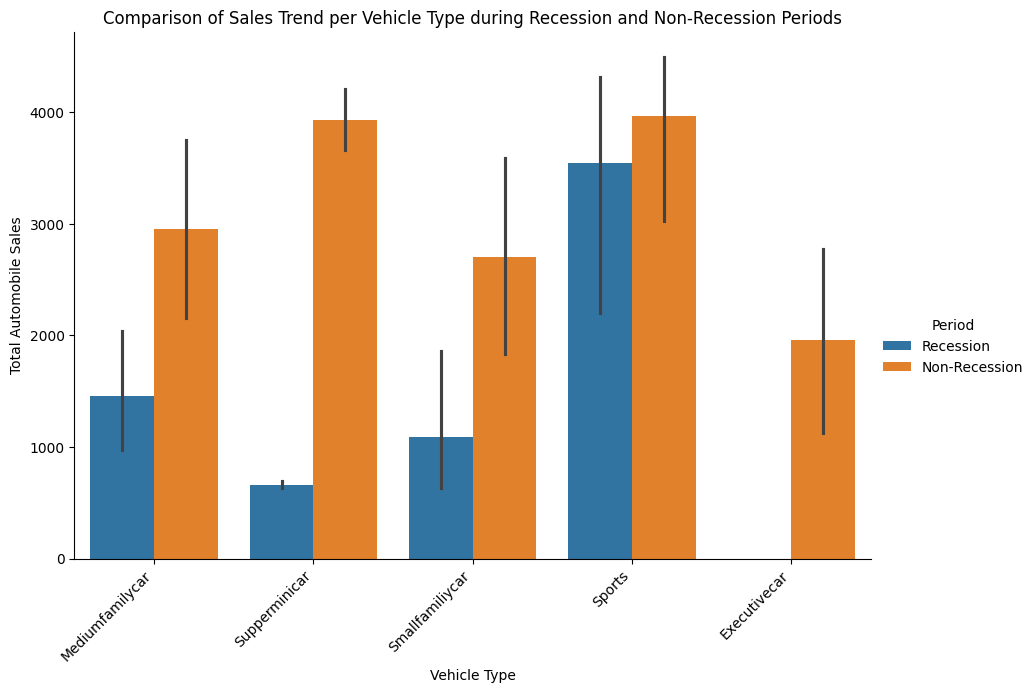

In [6]:
#Q 3: Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non- recession period.

# Assuming 'data' is your DataFrame containing the automobile sales data
# Define recession and non-recession periods
recession_years = range(2008, 2011)  # 2008, 2009, 2010
non_recession_years = range(2011, 2014)  # 2011, 2012, 2013

# Create a 'Period' column and assign values based on year
data['Period'] = 'Non-Recession'  # Initialize all rows as 'Non-Recession'
data.loc[data['Year'].isin(recession_years), 'Period'] = 'Recession'

# Create the categorical plot using Seaborn
# Convert range objects to lists before combining them
all_years = list(recession_years) + list(non_recession_years)
sns.catplot(
    data=data[data['Year'].isin(all_years)],
    x='Vehicle_Type',
    y='Automobile_Sales',
    hue='Period',
    kind='bar',  # Use 'bar' for comparison
    height=6,
    aspect=1.5,
)
plt.title(
    'Comparison of Sales Trend per Vehicle Type during Recession and Non-Recession Periods'
)
plt.xlabel('Vehicle Type')
plt.ylabel('Total Automobile Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

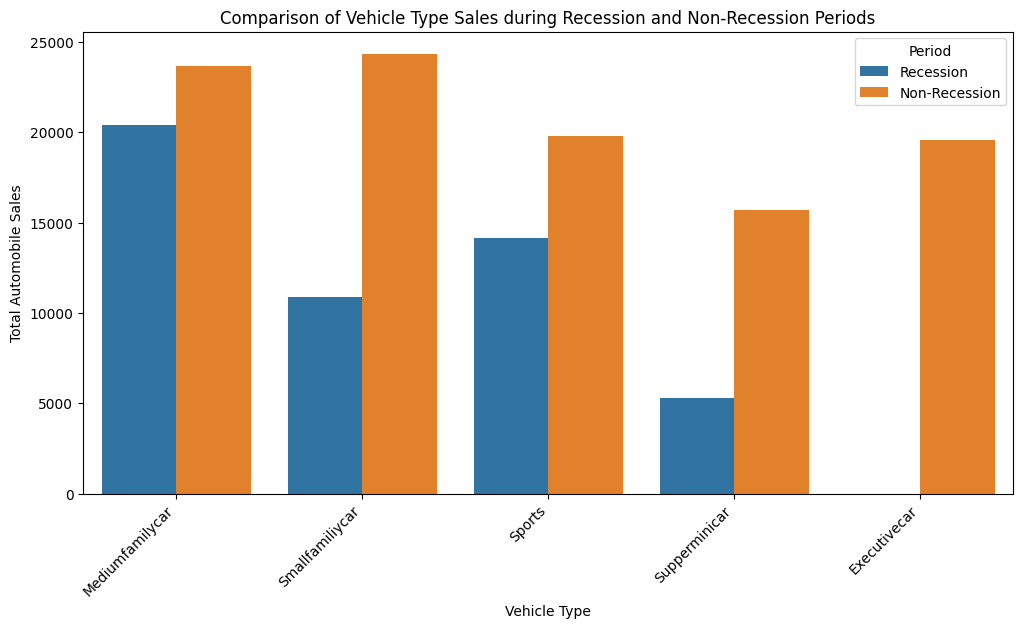

In [7]:
#Q 4: Now you want to compare the sales of different vehicle types during a recession and a non-recession period


# Assuming 'data' is your DataFrame containing the automobile sales data
# Define recession and non-recession periods
recession_years = range(2008, 2011)  # 2008, 2009, 2010
non_recession_years = range(2011, 2014)  # 2011, 2012, 2013

# Filter data for recession and non-recession periods
recession_data = data[data['Year'].isin(recession_years)]
non_recession_data = data[data['Year'].isin(non_recession_years)]

# Group data by vehicle type and sum sales for each period
recession_sales = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()
non_recession_sales = non_recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()

# Combine the data for plotting
recession_sales['Period'] = 'Recession'
non_recession_sales['Period'] = 'Non-Recession'
combined_sales = pd.concat([recession_sales, non_recession_sales])

# Create the bar plot using Seaborn
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.barplot(data=combined_sales, x='Vehicle_Type', y='Automobile_Sales', hue='Period')
plt.title('Comparison of Vehicle Type Sales during Recession and Non-Recession Periods')
plt.xlabel('Vehicle Type')
plt.ylabel('Total Automobile Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()